# Estrazione dei dati

## Descrizione del dataset

Abbiamo a disposizione due dataset:
- campioni positivi (dove c'è sicuramente un pedone)
- campioni negativi (dove invece il pedone non c'è)

Questi campioni sono organizzati in 3 insiemi disgiunti:
- Train Set
- Test Set
- Validation Set

Il nostro compito è quello di estrarre le immaggini di train, test e set per ogni campione positivo e negativo e creare per ogni immagine un "mapping" tale per cui assegniamo classe 1 o 0 se il pedone c'è o no.

In [1]:
# import delle librerie
import cv2
import numpy as np

## Campioni Positivi

Per quanto riguarda i campioni positivi, ogni immagine è "descritta" da delle boundary boxes che ci dicono dove si trovano i pedoni e a quale classe di pedone appartiene quella boundary box. A noi tuttavia interesserà sapere quelle appartenenti alla classe 1.

Per leggere le informazioni su queste boundary boxes prima devo leggere quali sono le "immagini" da tenere conto per ogni insieme (test, train e validation), ovvero devo prendere SOLO le boundary boxes delle annotations dei seguenti file txt:
- test_assignment.txt
- train_assignment.txt
- val_assignment.txt

Tuttavia, dal file di readMe leggiamo come ogni file di annotazione per ogni immagine è del tipo:

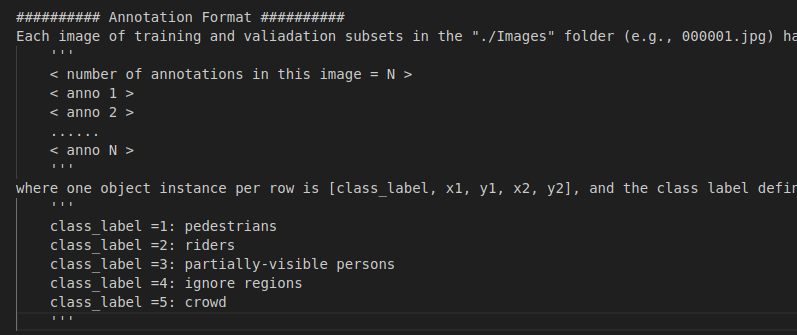

I tre file di test_assignment, train e val servono per capire quali 'immagini' considerare, quindi per quali immagini estrarre le boundary boxes dal corrispondente file di annotazione

In [2]:
def assign_sets():
    '''
    Questa funzione legge dalla cartella i seguenti file:
    - test_assignment.txt
    - train_assignment.txt
    - val_assignment.txt
    Poi ritorna tre array di valori per ogni categoria di set contente le annotazioni da vedere
    '''
    test_set = []
    train_set = []
    val_set = []
    # leggo prima Train
    with open('train_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            train_set.append(row)
    # poi test
    with open('test_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            test_set.append(row)
    # infine validation
    with open('val_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            val_set.append(row)
    
    print(f'Train set: {len(train_set)}')
    print(f'Test set: {len(test_set)}')
    print(f'Val set: {len(val_set)}')
    return train_set, test_set, val_set

In [3]:
def extract_boundary_box(valore, annotations):
    '''
    Questa funzione prende un valore in input, ovvero l'immagine dove cercare
    ed estrae le boundary box della classe 1 relative a quel valore.
    '''
    path_file = 'Annotations/' + valore + '.jpg.txt'
    # print(path_file)
    rows = []
    if path_file[12:] in annotations:
        # il file è presente in Annotations
        with open(path_file, 'r') as f:
            for row in f:
                row = row.strip()
                rows.append(row)
        rows = rows[1:] # faccio slicings
        bboxes = []
        for row in rows:
            row = row.split(' ')
            target,x,y,w,h = row
            if int(target) == 1:
                box = [x,y,w,h]
                bboxes.append(box)
        # print(f'Ho trovato {len(bboxes)} boundary boxes')
        return bboxes
    return None

Tuttavia dobbiamo prima di tutto 'esportare' i file da cui dobbiamo leggere

In [4]:
import os
directory = 'Annotations'
annotations = []
for root,dirs,files in os.walk(directory):
    for file in files:
        annotations.append(str(file))

In [5]:
annotations[0]

'000040.jpg.txt'

In [6]:
# creo i set
train, test, val = assign_sets()

positive_bboxes_train = []
for i in range(len(train)):
    bboxes = extract_boundary_box(train[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        positive_bboxes_train.append((train[i], bboxes))

positive_bboxes_test = []
for i in range(len(test)):
    bboxes = extract_boundary_box(test[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        positive_bboxes_test.append([test[i], bboxes])

positive_bboxes_val = []
for i in range(len(val)):
    bboxes = extract_boundary_box(val[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        positive_bboxes_val.append([val[i], bboxes])


print(f'Ci sono in totale {len(positive_bboxes_train)} file di annotazioni per il train')
print(f'Ci sono in totale {len(positive_bboxes_test)} file di annotazioni per il test')
print(f'Ci sono in totale {len(positive_bboxes_val)} file di annotazioni per il validation')

Train set: 7000
Test set: 1000
Val set: 1000
Ci sono in totale 6919 file di annotazioni per il train
Ci sono in totale 983 file di annotazioni per il test
Ci sono in totale 991 file di annotazioni per il validation


In questo modo metto in evidenza l'immagine da cercare e le boundary box associate

In [7]:
positive_bboxes_train[0]

('000040',
 [['45', '235', '79', '318'],
  ['60', '209', '120', '356'],
  ['119', '214', '168', '336'],
  ['94', '220', '136', '326'],
  ['213', '201', '287', '381'],
  ['268', '201', '339', '378'],
  ['312', '192', '389', '380'],
  ['374', '226', '391', '267'],
  ['417', '225', '438', '279'],
  ['428', '222', '446', '266'],
  ['443', '224', '456', '258'],
  ['449', '227', '467', '271'],
  ['396', '217', '406', '241'],
  ['402', '210', '413', '238'],
  ['409', '217', '419', '241'],
  ['531', '222', '550', '287'],
  ['527', '217', '538', '245'],
  ['511', '213', '522', '240'],
  ['515', '211', '525', '237'],
  ['491', '216', '502', '243'],
  ['484', '209', '494', '235'],
  ['473', '211', '483', '235'],
  ['477', '211', '487', '236'],
  ['468', '212', '476', '235'],
  ['461', '210', '471', '236'],
  ['456', '212', '466', '240'],
  ['448', '209', '459', '237'],
  ['439', '210', '450', '237'],
  ['431', '211', '442', '241'],
  ['420', '213', '432', '242']])

Utilizzo un array chiamato images_positive che contiene le immagini presenti nella cartella. Difatti alcune immagini potrebbero non essere presenti per vari motivi: questa parte è la fase iniziale di preprocessing dei dati

In [9]:
directory_p = 'Images_Positive'

# Questa lista contiene tutti path delle immagini
images_positive = []
for root,dirs,files in os.walk(directory_p):
    for file in files:
        images_positive.append(str(file))

print(f'Ci sono {len(annotations)} annotazioni per le boundary box')
print(f'Ci sono {len(images_positive)} immagini di campioni positivi')

Ci sono 8918 annotazioni per le boundary box
Ci sono 13259 immagini di campioni positivi


Ogni boundary box va letta come:[x,y,w,h], dove:
- x,y: coordinate del rettangolo in alto a sx dove inizia la boundary box
- w: larghezza (quindi x 'finale')
- h: altezza (quindi y 'finale')

L'idea è quella di usare il primo valore per 'aprire' l'immagine, poi usare le boundary box per fare slicing delle foto, quindi applicare il descrittore HOG ad ognuno di loro. 

Alla fine, dopo aver aperto l'immagine e aver calcolato il descrittore su ogni campione positivo, otterrò un vettore di label positive del tipo (descrittore, 1)

Definisco innanzitutto il descrittore HOG, utilizzando i parametri di Default e la dimensione della finestra fissata a h=128, w=64 pixel. Dalla documentazione vediamo che questi sono i valori di default.
Inoltre, per il momento, addestriamo il nostro descrittore su un modello di Default di OpenCV

### Descrittore HOG

#### Descrittore HOG

cv2.HOGDescriptor(
  
                win_size=(64, 128),
                block_size=(16, 16),
                block_stride=(8, 8),
                cell_size=(8, 8),
                nbins=9,
                win_sigma=DEFAULT_WIN_SIGMA,
                threshold_L2hys=0.2,
                gamma_correction=true,
                nlevels=DEFAULT_NLEVELS
                
              )

- win_size: dimensione della finestra di rilevamento in pixel (larghezza, altezza). Definisce la regione di interesse. Deve essere un multiplo intero della dimensione della cella.

- block_size: dimensione del blocco in pixel (larghezza, altezza). Definisce quante celle sono presenti in ciascun blocco. Deve essere un multiplo intero della dimensione della cella e deve essere inferiore alla finestra di rilevamento. Più piccolo è il blocco, maggiori saranno i dettagli che otterrai.

- block_stride: blocca il passo in pixel (orizzontale, verticale). Deve essere un multiplo intero della dimensione della cella. Il block_stride definisce la distanza tra i blocchi adiacenti, ad esempio, 8 pixel in orizzontale e 8 pixel in verticale. Block_strides più lunghi rendono l'algoritmo più veloce (perché vengono valutati meno blocchi) ma l'algoritmo potrebbe non funzionare altrettanto bene.

- cell_size: dimensione della cella in pixel (larghezza, altezza). Determina la dimensione della tua cella. Più piccola è la cella, più dettagli otterrai.

- nbins: numero di bin per gli istogrammi. Determina il numero di contenitori angolari utilizzati per creare gli istogrammi. Con più contenitori catturi più direzioni del gradiente. HOG utilizza gradienti senza segno, quindi i contenitori angolari avranno valori compresi tra 0 e 180 gradi.

- win_sigma: parametro della finestra di livellamento gaussiano. Le prestazioni dell'algoritmo HOG possono essere migliorate smussando i pixel vicino ai bordi dei blocchi applicando una finestra spaziale gaussiana a ciascun pixel prima di calcolare gli istogrammi.

- soglia_L2hys: ritiro del metodo di normalizzazione L2-Hys (norma L2 ritagliata in stile Lowe). Il metodo L2-Hys viene utilizzato per normalizzare i blocchi e consiste in una norma L2 seguita da ritaglio e rinormalizzazione. Il ritaglio limita il valore massimo del vettore descrittore per ciascun blocco in modo che abbia il valore della soglia specificata (0,2 per impostazione predefinita).

- gamma_correction: flag per specificare se è richiesta o meno la preelaborazione della correzione gamma. L'esecuzione della correzione gamma aumenta leggermente le prestazioni dell'algoritmo HOG.

- nlevels: aumenta il numero massimo di finestre di rilevamento.

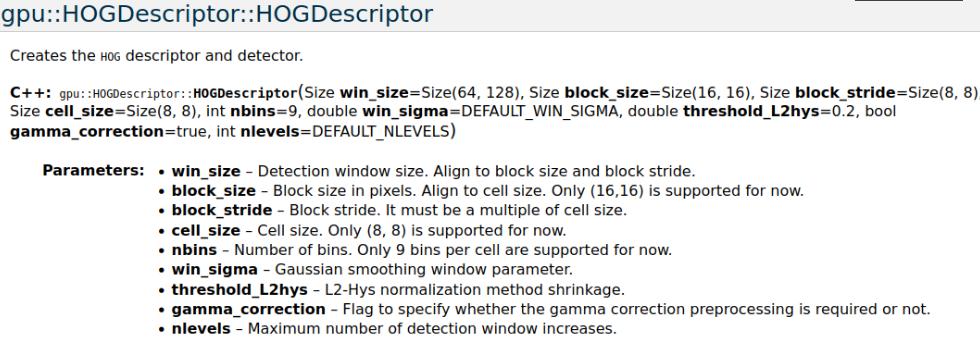

In [10]:
# Specify the parameters for our HOG descriptor
win_size = (64, 128)
cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 9

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

### Estrazione dei campioni positivi

Definisco una funzione che, presa un elemento da un set (train, test o val):
- estrare le boundary boxes
- per ognuna di essere ritorna un descrittore

La funzione dovrà tornare quindi una lista di descrittori che useremo per costruire l'esempio di campioni positivi

In [11]:
images_positive[0]

'000040.jpg'

In [12]:
def extract_subset_bbox(valore):
    '''
    Presa in input l'immagine da 'analizzare', estraggo le boundary boxes e faccio slicing
    '''
    image_path, bboxes = valore
    if (f'{image_path}.jpg' in images_positive):
        image = cv2.imread(f'Images_Positive/{image_path}.jpg')
        sub_images = []
        for bbox in bboxes:
            # faccio il casting degli interi
            for i in range(len(bbox)):
                bbox[i] = int(bbox[i])
            x,y,w,h = bbox
            if w != x and h != y:
                # evito boundary box false
                sub_image = image[y:h, x:w].copy()
                # cv2.imshow(f'Boundary Box: {bbox}', sub_image)
                # cv2.waitKey(0)
                sub_images.append(sub_image)
        # cv2.destroyAllWindows()
        return sub_images
    return []

In [13]:
bboxes_0_example = extract_subset_bbox(positive_bboxes_train[0])
len(extract_subset_bbox(positive_bboxes_train[0])) == len(positive_bboxes_train[0][1])
# la dimensione corrisponde

True

#### Funzione di image processing

Realizzo anche una funzione di image proccessing per fare in modo che ogni immagine croppata dalla funzione precedente venga riscalata a 64x128 pixel e:
- prima viene convertita in scala di grigi
- eventualmente faccio equilizzazione dei colori per portarli tutti a livelli di contrasto e luminanza identici
- poi applico un filtro gaussiano
- infine faccio resize dell'immagine

L'idea è quella di addestrare il nostro modello con immagini che siano uguali in condizioni di valori di contrasto e luminanza. Qui l'euristica considerata è: *se un pedone è presente, deve esserlo in qualsiasi condizione di luce*

In [14]:
def subimage_processing(img):
    # faccio conversione in scala di grigi
    # cv2.imshow('Immagine originale', img)
    # cv2.waitKey(0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # poi applico una equilizzazione
    img = cv2.equalizeHist(img)
    # cv2.imshow('Immagine equilizzata', img)
    # cv2.waitKey(0)
    # quindi applico un filtro gaussiano er ridurre eventuale rumore
    img = cv2.GaussianBlur(img,(3,3),0) # kernel size = 3x3, sigma_x = 0
    # cv2.imshow('Immagine con filtro', img)
    # cv2.waitKey(0)
    # infine faccio reshape
    img = cv2.resize(img, (64, 128))  # Larghezza x Altezza
    # cv2.imshow('Immagine con reshape', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return img

Come si applicano i descrittori?

In [15]:
subimages = extract_subset_bbox(positive_bboxes_train[0])
descriptors = [] # definisco i descrittori per ogni immagine
for subimage in subimages:
    subimage = subimage_processing(subimage)
    descriptor = hog.compute(subimage)
    descriptors.append(descriptor)

In [16]:
descriptors[0].shape

(3780,)

In [17]:
descriptors[1].shape

(3780,)

Notiamo come tutti i descrittori hanno lo stesso numero di feature a parità di dimensione!

adesso che sappiamo che funziona per un campione, partiamo con la costruzione dei campioni positivi

### Estrazione campioni positivi dalle bboxes

Vista l'alta dimensionalità del dataset decidiamo di prendere un sottoesempio del campione. Per esempio decidiamo di prendere in totale qualcosa come 2000 campioni dal dataset.
Rispetto le proporzioni del 78% train, 11% test e 11% validazione. Su 2000 campioni avremo:
- 1560 campioni di train
- 220 campioni di test
- 220 campioni di validazione

In [18]:
# randomizziamo
import random

random.shuffle(positive_bboxes_train)
random.shuffle(positive_bboxes_test)
random.shuffle(positive_bboxes_val)

reduced_train = positive_bboxes_train[:1560]
reduced_test = positive_bboxes_test[:220]
reduced_val = positive_bboxes_val[:1000]

In [26]:
positive_samples = []

### Train positivi

In [27]:
sub_sets = []
for i in range(len(reduced_train)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_train[i])
    sub_sets.append(subimages)

Index0
Index100
Index200
Index300
Index400
Index500
Index600
Index700
Index800
Index900
Index1000
Index1100
Index1200
Index1300
Index1400
Index1500


In [28]:
pos_train_samples = []

In [29]:
train_descriptors = []

Salvo i descrittori di addestramento perché poi alla fine dovrei standardizzare i dati, considerando i valori di media e varianza dei descrittori di train!

Questo processo è la *standardizzazione*

In [30]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                train_descriptors.append(descriptor)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                pos_train_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700
Index 800
Index 900
Index 1000
Index 1100
Index 1200
Index 1300
Index 1400
Index 1500


In [31]:
print(f'Ci sono {len(pos_train_samples)} campioni per il train')
print(f'Ci sono {len(pos_train_samples[0][0])} descrittori per ogni immagine')

Ci sono 31726 campioni per il train
Ci sono 3780 descrittori per ogni immagine


### Test positivi

In [32]:
sub_sets = []
for i in range(len(reduced_test)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_test[i])
    sub_sets.append(subimages)

Index0
Index100
Index200


In [33]:
pos_test_samples = []

In [34]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                pos_test_samples.append(new_sample)

Index 0
Index 100
Index 200


In [35]:
print(f'Ci sono {len(pos_test_samples)} campioni per il test')
print(f'Ci sono {len(pos_test_samples[0][0])} descrittori per ogni immagine')

Ci sono 3937 campioni per il test
Ci sono 3780 descrittori per ogni immagine


### Val positivi

In [36]:
sub_sets = []
for i in range(len(reduced_val)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_val[i])
    sub_sets.append(subimages)

Index0
Index100
Index200
Index300
Index400
Index500
Index600
Index700
Index800
Index900


In [37]:
pos_val_samples = []

In [38]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                pos_val_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700
Index 800
Index 900


In [39]:
print(f'Ci sono {len(pos_val_samples)} campioni per la validazione')
print(f'Ci sono {len(pos_val_samples[0][0])} descrittori per ogni immagine')

Ci sono 19668 campioni per la validazione
Ci sono 3780 descrittori per ogni immagine


## Campioni Negativi

I campioni negativi (ovvero quelli con classe 0) li trovo nella cartella Images_Negative

In [40]:
directory_n = 'Images_negative'

images_negative = []

In [41]:
train_n = directory_n + '/train_neg'
test_n = directory_n + '/test_neg'
val_n = directory_n + '/val_neg'

In [42]:
neg_train_img = []
neg_test_img = []
neg_val_img = []

In [43]:
for root,dirs,files in os.walk(train_n):
    for file in files:
        images_negative.append(str(file))
        neg_train_img.append(str(file))

for root,dirs,files in os.walk(test_n):
    for file in files:
        images_negative.append(str(file))
        neg_test_img.append(str(file))

for root,dirs,files in os.walk(val_n):
    for file in files:
        images_negative.append(str(file))
        neg_val_img.append(str(file))

In [44]:
print(f'Ci sono {len(images_negative)} immagini di campioni negativi')
print(f'Ci sono {len(neg_train_img)} immagini di train campioni negativi')
print(f'Ci sono {len(neg_test_img)} immagini di test campioni negativi')
print(f'Ci sono {len(neg_val_img)} immagini di validazione campioni negativi')

Ci sono 1671 immagini di campioni negativi
Ci sono 1015 immagini di train campioni negativi
Ci sono 453 immagini di test campioni negativi
Ci sono 203 immagini di validazione campioni negativi


Queste immagini sono particolari, difatti se applicassi un descrittore HOG e un multiscale non troverei nessun pedestrian nell'immagine

In [45]:
path = 'Images_negative/train_neg/'
neg_train_img[0]

'00000002a.png'

In [280]:
# hog_n = cv2.HOGDescriptor()
# hog_n.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [281]:
# neg_example_img = cv2.imread(path + neg_train_img[0])
# cv2.imshow('Immagine esempio', neg_example_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [282]:
# locations, confidence = hog_n.detectMultiScale(neg_example_img, padding=(4,4), scale=1.2)

In [283]:
# len(locations)

0

Come previsto, il detector HOG non funziona!
Quindi, adesso, la cosa migliore è quella di selezionare dei campioni randomici dalle immagini per costruire dei campioni negativi ed estrarre comunque i descrittori

In [42]:
# import random

# h,w,_ = neg_example_img.shape
# portion_size = (200, 200) # da intedersi come (x,y)

# tries = 10

# sub_images = []
# for i in range(tries):
#     x = random.randint(0, w-portion_size[1]-1)
#     y = random.randint(0, h-portion_size[0]-1)
#     sub_neg_img = neg_example_img[y:y+portion_size[1], x:x+portion_size[0]].copy()
#     sub_images.append(sub_neg_img)

In [43]:
# for sub_image in sub_images:
#     cv2.imshow('Immagine esempio', sub_image)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()

Ora che sappiamo che comunque riesco a prendere delle finestre casuali, posso procedere a randomizzare il tutto per campioni negativi di train, test e validation. 

In [46]:
negative_samples = []

### Train Negativi

Qui ci dobbiamo ricordare che per calcolare media e varianza del set di train dobbiamo incrementare la variabile dei descrittori!

In [47]:
len(train_descriptors)

31726

In [48]:
neg_train_samples = []

In [49]:
path_train = train_n + '/'
path_train

'Images_negative/train_neg/'

In [50]:
path_train + neg_train_img[0] # prende una immagine

'Images_negative/train_neg/00000002a.png'

In [51]:
import random
portion_size = (200, 200) # da intedersi come (y,x) sempre

In [52]:
for i in range(len(neg_train_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_train + neg_train_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(30,50) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        w_rand = random.randint(64,portion_size[1])
        h_rand = random.randint(128, portion_size[0])
        x = random.randint(0, w-w_rand-1)
        y = random.randint(0, h-h_rand-1)
        sub_neg_img = image[y:y+h_rand, x:x+w_rand].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        train_descriptors.append(descriptor)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_train_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700
Index 800
Index 900
Index 1000


In [53]:
print(f'Ci sono {len(neg_train_samples)} esempi di addestramento negativi')

Ci sono 40538 esempi di addestramento negativi


Unisco i campioni negativi e i campioni positivi, creando i campioni per train

In [54]:
train_samples = pos_train_samples + neg_train_samples

In [55]:
print(f'In totale ci sono {len(train_samples)} campioni di addestramento')

In totale ci sono 72264 campioni di addestramento


### Test Negativi

In [56]:
neg_test_samples = []

In [57]:
path_test = test_n + '/'
path_test

'Images_negative/test_neg/'

In [58]:
for i in range(len(neg_test_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_test + neg_test_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(10,30) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        w_rand = random.randint(64,portion_size[1])
        h_rand = random.randint(128, portion_size[0])
        x = random.randint(0, w-w_rand-1)
        y = random.randint(0, h-h_rand-1)
        sub_neg_img = image[y:y+h_rand, x:x+w_rand].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_test_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400


In [59]:
print(f'Ci sono {len(neg_test_samples)} esempi di test negativi')

Ci sono 9162 esempi di test negativi


In [60]:
test_samples = pos_test_samples + neg_test_samples

In [61]:
print(f'Ci sono {len(test_samples)} esempi di test in totale')

Ci sono 13099 esempi di test in totale


### Validazione negativi

In [62]:
neg_val_samples = []

In [63]:
path_val = val_n + '/'
path_val

'Images_negative/val_neg/'

In [64]:
for i in range(len(neg_val_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_val + neg_val_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(20,40) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        w_rand = random.randint(64,portion_size[1])
        h_rand = random.randint(128, portion_size[0])
        x = random.randint(0, w-w_rand-1)
        y = random.randint(0, h-h_rand-1)
        sub_neg_img = image[y:y+h_rand, x:x+w_rand].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_val_samples.append(new_sample)

Index 0
Index 100
Index 200


In [65]:
print(f'Ci sono {len(neg_val_samples)} campioni di validazione negativi')

Ci sono 6104 campioni di validazione negativi


In [66]:
val_samples = pos_val_samples + neg_val_samples

In [67]:
print(f'CI sono {len(val_samples)} campioni di validazione in totale')

CI sono 25772 campioni di validazione in totale


## Risultati finali della preparazione dei dati

Adesso, se volessimo utilizzare i campioni per addestrare un modello dobbiamo vedere gli array:
- train_samples
- test_samples
- val_samples

Salvo in un file denominato 'summary_parameters' i parametri finora trovati, come numero di campioni utilizzati in fase di train, quindi campioni etc

In [68]:
len(train_samples)

72264

In [69]:
len(test_samples)

13099

In [70]:
len(val_samples)

25772

In [71]:
len(positive_samples)

55331

In [72]:
len(negative_samples)

55804

In [73]:
def count_class_set(set_):
    class_0 = 0
    class_1 = 0
    for item in set_:
        if item[1] == 0:
            class_0 += 1
        else:
            class_1 += 1
    return (class_0, class_1)

In [74]:
suddivisione_train = count_class_set(train_samples)

In [75]:
print(f'Suddivisione: {suddivisione_train[0]} elementi di classe 0, {suddivisione_train[1]} elementi di classe 1')

Suddivisione: 40538 elementi di classe 0, 31726 elementi di classe 1


In [76]:
suddivisione_test = count_class_set(test_samples)
print(f'Suddivisione: {suddivisione_test[0]} elementi di classe 0, {suddivisione_test[1]} elementi di classe 1')

Suddivisione: 9162 elementi di classe 0, 3937 elementi di classe 1


In [77]:
suddivisione_val = count_class_set(val_samples)
print(f'Suddivisione: {suddivisione_val[0]} elementi di classe 0, {suddivisione_val[1]} elementi di classe 1')

Suddivisione: 6104 elementi di classe 0, 19668 elementi di classe 1


# Standardizzazione dati

Prima di procedere con l'implementazione del classificatore, procediamo con la standardizzazione dei dati. Per farlo usiamo i descrittori di train per determinare media e varianza con cui "normalizare" i dati da mandare in pasto al nostro classiicatore

In [78]:
len(train_descriptors)

72264

In [79]:
np_descriptors = np.array(train_descriptors)
np_descriptors.shape

(72264, 3780)

In [81]:
media = np_descriptors.mean()
media

0.13119781

In [82]:
# media = 0.13056211 
# calcolato quando utilizzo i dati al massimo, quindi sulla base dei valori usati per addestrare
# il modello....andrebbe cambiato

In [83]:
std = np_descriptors.std()
std

0.1018532

In [307]:
# std = 0.10273082

In [84]:
type(train_samples[0][0])

numpy.ndarray

In [85]:
def standardizza(h):
    return (h-media)/(std)

In [ ]:
train_samples_no_std = train_samples.copy() # dati non standardizzti

In [86]:
# train_samples_np = np.array(train_samples)
# train_samples_np = (train_samples_np - media) / std
std_train_samples = []
for i in range(len(train_samples)):
    h, t = train_samples[i]
    h = standardizza(h)
    std_sample = (h,t)
    std_train_samples.append(std_sample)

In [87]:
len(std_train_samples)

72264

In [ ]:
test_samples_no_std = test_samples.copy()

In [88]:
# test_samples_np = np.array(test_samples)
# test_samples_np = (test_samples_np - media) / std
std_test_samples = []
for i in range(len(test_samples)):
    h, t = test_samples[i]
    h = standardizza(h)
    std_sample = (h,t)
    std_test_samples.append(std_sample)

In [89]:
len(std_test_samples)

13099

In [ ]:
val_samples_no_std = val_samples.copy()

In [90]:
# val_samples_np = np.array(val_samples)
# val_samples_np = (val_samples_np - media) / std
std_val_samples = []
for i in range(len(val_samples)):
    h, t = val_samples[i]
    h = standardizza(h)
    std_sample = (h,t)
    std_val_samples.append(std_sample)

In [91]:
len(std_val_samples)

25772

Copio i valori dei campioni non standardizzati per testare più avanti il classificatore senza fare data preprocessing, e analizzare le sue statitische

# Salvataggio dei valori finora trovati

Il file summary_data conterrà praticamente il numero di valori che stiamo usando per addestrare il nostro classificatore

In [92]:
with open('summary_data.txt', 'w') as f:
    print(f'Campioni per il train: {len(train_samples)}', file=f)
    print(f'Campioni di test: {len(test_samples)}', file=f)
    print(f'Campioni di validazione: {len(val_samples)}', file=f)
    print(f'Campioni positivi: {len(positive_samples)}', file=f)
    print(f'Campioni negativi: {len(negative_samples)}', file=f)
    print(f'Suddivisione train: {suddivisione_train[0]} elementi di classe 0, {suddivisione_train[1]} elementi di classe 1', file=f)
    print(f'Suddivisione test: {suddivisione_test[0]} elementi di classe 0, {suddivisione_test[1]} elementi di classe 1', file=f)
    print(f'Suddivisione: {suddivisione_val[0]} elementi di classe 0, {suddivisione_val[1]} elementi di classe 1', file=f)
    

In un file chiamato invece 'parameters.txt' salvo i valori di media e deviazione standard che servono per standardizzare i dati. Difatti, per la natura 'variabile' dei dati, la standardizzazione valutata sull'insieme di train ci permette di avere valori centrati nello spazio delle features di training.

In [93]:
with open('parameters.txt', 'w') as f:
    print(media, file=f)
    print(std, file=f)

# Classificazione dati: costruzione del classificatore

In [94]:
# Importazione delle librerie necessarie
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

In [95]:
# Preparazione dei dati di train
X_train = np.array([item[0] for item in std_train_samples])
y_train = np.array([item[1] for item in std_train_samples])

# Preparazione dei dati di validazione
X_val = np.array([item[0] for item in std_val_samples])
y_val = np.array([item[1] for item in std_val_samples])

# Preparazione dei dati di test
X_test = np.array([item[0] for item in std_test_samples])
y_test = np.array([item[1] for item in std_test_samples])

In [ ]:
# Preparazione dei dati di train
X_train_ns = np.array([item[0] for item in train_samples_no_std])
y_train_ns = np.array([item[1] for item in train_samples_no_std])

# Preparazione dei dati di validazione
X_val_ns = np.array([item[0] for item in val_samples_no_std])
y_val_ns = np.array([item[1] for item in val_samples_no_std])

# Preparazione dei dati di test
X_test_ns = np.array([item[0] for item in test_samples_no_std])
y_test_ns = np.array([item[1] for item in test_samples_no_std])

In [96]:
def salva_modello(model_svm):
    filename = "finalized_model.sav"
    pickle.dump(model_svm, open(filename, 'wb'))

def carica_modello(filename):
    model = pickle.load(open(filename, 'rb'))
    return model

Definisco una funzione peril calcolo delle metriche di TP, FP, FN

In [97]:
def stima_parametri_modello(y_pred, y_truth):
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_truth[i] and y_pred[i] == 1:
            TP += 1
        elif y_pred[i] != y_truth[i] and y_pred[i] == 1:
            FP += 1
        elif y_pred[i] != y_truth[i] and y_pred[i] == 0:
            FN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = TP / (TP + (FN + FP)/2 )
    return TP, FP, FN, precision, recall, f1_score

In [98]:
# test
test_pred = [0,0,1,1,0,0]
test_truth = [0,0,1,0,0,0]
stima_parametri_modello(test_pred, test_truth)

(1, 1, 0, 0.5, 1.0, 0.6666666666666666)

## Addestro il modello con i dati standardizzati

Creo un dizionario per contenere gli score per ogni valore di C

In [99]:
best_c_scores = {}

In [100]:
# Iperparametri e score
classifier_scores = {}

c_values = [0.01, 0.1, 1, 10, 100]

for value in c_values:

    # Istanziazione del classificatore
    svm_classifier = LinearSVC(C=value)
    svm_classifier.fit(X_train, y_train)

    val_prediction = svm_classifier.predict(X_val)
    val_score = accuracy_score(y_val, val_prediction)

    # Qui bisogna calcolare TP, FP, TN e FN
    TP, FP, FN, precision, recall, f1_score = stima_parametri_modello(val_prediction, y_val)
    best_c_scores[value] = [TP, FP, FN, precision, recall, f1_score]

    # Salvataggio del punteggio
    classifier_scores[value] = val_score

print(classifier_scores)
print(best_c_scores)

c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-pa

{0.01: 0.9171581561384449, 0.1: 0.9164985255315846, 1: 0.8934114542914792, 10: 0.8996585441564489, 100: 0.8970200217290082}
{0.01: [17873, 340, 1795, 0.9813320155932576, 0.9087350010168802, 0.9436392914653784], 0.1: [17909, 393, 1759, 0.9785269369467817, 0.9105653853976001, 0.9433236765867791], 1: [17343, 422, 2325, 0.9762454264002252, 0.8817876754118364, 0.9266155531215772], 10: [17518, 436, 2150, 0.9757157179458616, 0.8906853772625585, 0.9312636223486258], 100: [17537, 523, 2131, 0.9710409745293466, 0.891651413463494, 0.9296543681085666]}


Salvo i parametri trovati in fase di addestramento e ricerca del miglior iperparametro

In [101]:
best_c_scores

{0.01: [17873,
  340,
  1795,
  0.9813320155932576,
  0.9087350010168802,
  0.9436392914653784],
 0.1: [17909,
  393,
  1759,
  0.9785269369467817,
  0.9105653853976001,
  0.9433236765867791],
 1: [17343,
  422,
  2325,
  0.9762454264002252,
  0.8817876754118364,
  0.9266155531215772],
 10: [17518,
  436,
  2150,
  0.9757157179458616,
  0.8906853772625585,
  0.9312636223486258],
 100: [17537,
  523,
  2131,
  0.9710409745293466,
  0.891651413463494,
  0.9296543681085666]}

In [102]:
classifier_scores

{0.01: 0.9171581561384449,
 0.1: 0.9164985255315846,
 1: 0.8934114542914792,
 10: 0.8996585441564489,
 100: 0.8970200217290082}

In [103]:
with open('parametri_best_c.txt', 'w') as f:
    for key, values in best_c_scores.items():
        c_value = float(key)
        TP, FP, FN, precision, recall, f1_score = values
        print(f'{c_value}, {TP}, {FP}, {FN}, {precision}, {recall}, {f1_score}', file=f)

In [104]:
# Ricerca del miglior iperparametro
best_c = 0
best_score = 0

# for item in classifier_scores.items():
# #     if item[1] > best_score:
#         best_c = item[0]
#         best_score = item[1]


for key, values in best_c_scores.items():
    c_value = float(key)
    TP, FP, FN, precision, recall, f1_score = values
    if f1_score >= best_score:
        best_score = f1_score
        best_c = c_value

#best_c = 1
#best_c = 0.01

# Istanziazione del classificatore
svm_classifier = LinearSVC(C=best_c)
svm_classifier.fit(X_train, y_train)

# Test sui dati di test
test_prediction = svm_classifier.predict(X_test)
test_score = accuracy_score(y_test, test_prediction)
print(f"Accuratezza del classificatore sui dati di test: {(test_score * 100):.2f}%")

c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ivans\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuratezza del classificatore sui dati di test: 93.05%


Salviamo il modello in maniera preventiva

In [105]:
# salva_modello(svm_classifier)

Testiamo anche il fatto che dobbiamo caricare il modello

In [106]:
svm_classifier = carica_modello("finalized_model.sav")

# Test sui dati di test
test_prediction = svm_classifier.predict(X_test)
test_score = accuracy_score(y_test, test_prediction)
print(f"Accuratezza del classificatore sui dati di test: {(test_score * 100):.2f}%")

Accuratezza del classificatore sui dati di test: 93.05%


## Addestramento con dati senza standardizzazione

In fase di preprocessing avevamo standardizzato i dati per questioni di analisi dei dati, per fare in modo che i dati fossero tutti riportati ad uno z-score comune.

Per brevità, decidiamo comunque di addestrare il modello con dati senza standardizzazione, in maniera tale da vedere l'effetto della standardizzazione in fase di classificazione!

In [ ]:
best_c_scores_ns = {}

In [ ]:
# Iperparametri e score
classifier_scores_ns = {}

c_values = [0.01, 0.1, 1, 10, 100]

for value in c_values:

    # Istanziazione del classificatore
    svm_classifier_ns = LinearSVC(C=value)
    svm_classifier_ns.fit(X_train_ns, y_train_ns)

    val_prediction = svm_classifier_ns.predict(X_val_ns)
    val_score = accuracy_score(y_val_ns, val_prediction)

    # Qui bisogna calcolare TP, FP, TN e FN
    TP, FP, FN, precision, recall, f1_score = stima_parametri_modello(val_prediction, y_val_ns)
    best_c_scores_ns[value] = [TP, FP, FN, precision, recall, f1_score]

    # Salvataggio del punteggio
    classifier_scores_ns[value] = val_score

print(classifier_scores_ns)
print(best_c_scores_ns)

In [ ]:
best_c_scores_ns

In [ ]:
classifier_scores_ns

In [ ]:
with open('parametri_best_c_ns.txt', 'w') as f:
    for key, values in best_c_scores_ns.items():
        c_value = float(key)
        TP, FP, FN, precision, recall, f1_score = values
        print(f'{c_value}, {TP}, {FP}, {FN}, {precision}, {recall}, {f1_score}', file=f)

# Determinare le scale migliori

Per determinare le scale migliori utilizzo una euristica basata su:
- dimensione media delle finestre più grandi
- dimensione media delle finestre più piccole

Infine faccio una media del rapporto di scala della mia finestra win=(64,128) e la dimensione della media delle finestre più grandi e più piccole. La terza scala sarà semplicemente la stessa cosa, ma valutata come media tra i rapporti di scala che ho trovato

Per fare tutto ciò tuttavia necessito delle boundary boxes di train!

In [107]:
len(positive_bboxes_train)

6919

In [108]:
def find_boxes(bboxes):
    bboxes_area = []
    for bbox in bboxes:
        # faccio il casting degli interi
        for i in range(len(bbox)):
            bbox[i] = int(bbox[i])
        x1,y1,x2,y2 = bbox
        area = abs((x2-x1)*(y2-y1))
        bbox_area = (bbox,area)
        bboxes_area.append(bbox_area)
    # print(bboxes_area)
    bboxes_area.sort(key=lambda tup: tup[1])
    # print(bboxes_area)
    min_boundary = bboxes_area[0][0]
    max_bounday = bboxes_area[-1][0]
    medium = len(bboxes_area) // 2
    med_boundary = bboxes_area[medium][0]
    # print(min_boundary)
    # print(med_boundary)
    # print(max_bounday)
    return min_boundary, med_boundary, max_bounday


In [109]:
def calculate_long(bbox):
    x1, y1, x2, y2 = bbox
    delta_x = abs((x2-x1))
    delta_y = abs((y2-y1))
    return delta_x, delta_y

In [ ]:
# min, med, max = find_boxes(positive_bboxes_train[0][1])

In [110]:
d_max = []
d_min = []
d_med = []

In [111]:
for i in range(len(positive_bboxes_train)):
    bboxes = positive_bboxes_train[i][1]
    min_v, med_v, max_v = find_boxes(bboxes)
    d_max.append(calculate_long(max_v))
    d_med.append(calculate_long(med_v))
    d_min.append(calculate_long(min_v))

In [112]:
d_max[:5]

[(46, 115), (58, 141), (201, 490), (59, 143), (81, 200)]

In [113]:
def calcola_media(d_bbooxes):
    x_boxes = []
    y_boxes = []
    for i in range(len(d_bbooxes)):
        x_boxes.append(d_bbooxes[i][0])
        y_boxes.append(d_bbooxes[i][1])
    media_x = sum(x_boxes) / len(x_boxes)
    media_y = sum(y_boxes) / len(y_boxes)
    return (media_x, media_y)

In [114]:
media_max = calcola_media(d_max)
media_med = calcola_media(d_med)
media_min = calcola_media(d_min)

In [115]:
media_max

(86.08194825841885, 213.02673796791444)

In [116]:
media_med

(48.39962422315364, 120.97528544587368)

In [117]:
media_min

(27.834369128486774, 72.40453822806764)

In [118]:
winSize = (64, 128)

In [119]:
def find_scala_ottima(media_value, winSize = (64, 128)):
    x_win = winSize[1]
    y_win = winSize[0]
    f_x = media_value[0] / x_win
    f_y = media_value[1] / y_win
    return (1/f_x), (1/f_y)
    # return (1/f_x)

In [120]:
f_max = find_scala_ottima(media_max)
f_max

(1.4869551931578355, 0.300431770258058)

In [121]:
f_med = find_scala_ottima(media_med)
f_med

(2.6446486321843543, 0.5290336762927883)

In [122]:
f_min = find_scala_ottima(media_min)
f_min

(4.598631260839314, 0.8839224938968037)

In [123]:
scale_x = [1/f_min[0], 1/f_med[0], 1/f_max[0]] # in questo modo prima prende i dettagli piccoli, verso quelli più grandi
scale_x

[0.21745600881630292, 0.3781220642433878, 0.6725152207688972]

In [124]:
best_scales = scale_x.copy()
best_scales.reverse()
print(best_scales)

[0.6725152207688972, 0.3781220642433878, 0.21745600881630292]


Le scale migliori sono state calcolate con una euristica sul mio insieme di addestramento, un po' come fatto per trovare i valori di media e deviazione standard per standardizzare i dati

In [323]:
#best_scales = [0.6725152207688972, 0.3781220642433878, 0.21745600881630292]

In [125]:
scale_y = [1/f_min[1], 1/f_med[1], 1/f_max[1]]
scale_y

[1.1313209098135568, 1.8902388350917763, 3.3285427807486636]

# MultiScale Sliding Window

La tecnica della multiscale sliding window applica delle finestre scorrevoli per tutta l'immagine e cerca di trovare quali immagini hanno un valore di predizione sicuramente positivo (c'è un pedone), ma anche un valore di 'confidence' adatto.

Iteriamo questo processo per più scale.

Tuttavia notiamo anche che ogni prediction è associata ad un valore di score. Questo valore ci da più informazioni sul perché quella finestra è stata etichettata come 'Pedone': questo deriva dal fatto che intrinsicamente il classificatore ci restituisce un valore di confidence o sicurezza.

Impostare un valore di score maggiore di una soglia fissa ci permette di valutare meno finestre ed evitare che parti parziali del corpo vengano considerate giustamente persone. Sebbene potrebbe sembrare un iperparametro, in maniera empirica, svolgendo test su diverse immagini, il valor medio di score quando effettivamente c'è un pedone in una immagine (quindi è sicuro che ci sia), non scende quasi mai il 0.7.

Si preferisce usare la soglia anche per ridurre il numero di finestre, che altrimenti potrebbe portare al fallimento dell'esecuzione

In [126]:
def multiscale(image, stride, window_size, scales):
    
    new_image = image.copy()
    # facciamo una 

    # Estrazione della tupla delle dimensioni della finestra
    window_size_w, window_size_h = window_size

    detections = {}

    for scale in scales:

        new_image = cv2.GaussianBlur(new_image,(3,3),0)

        resized_image = cv2.resize(new_image, None, fx=scale, fy=scale)

        detections[scale] = []

        for y in range(0, resized_image.shape[0] - window_size_h, stride):
            for x in range(0, resized_image.shape[1] - window_size_w, stride):
        
                # Estrai la finestra
                window = resized_image[y:y+window_size_h,x:x+window_size_w]

                # Preprocessing
                window_subprocessed = subimage_processing(window)

                # Estrai i descrittori dalla finestra
                descriptor = np.array(hog.compute(window_subprocessed)).reshape(1,-1)

                # standardizza i descrittori
                descriptor_normalized = (descriptor - media) / std

                if not np.isnan(descriptor_normalized).any():
                    pred = svm_classifier.predict(descriptor_normalized)
                    score = svm_classifier.decision_function(descriptor_normalized)            

                    if pred == 1 and score >= 0.7:
                        detection = (x, y, score)
                        detections[scale].append(detection)
    
    return detections

In [242]:
# image_path = "Images_Positive/000040.jpg"
# test_image = cv2.imread(image_path)

# dets = multiscale(test_image, 15, (64,128), best_scales)
# dets_scaled = function_scale(dets, best_scales, test_image)
# dets_nms = calcola_nms(dets_scaled)

# new_image = test_image.copy()

# for bbox in dets_nms:

#     x, y, w, h, c = bbox

#     cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     print(bbox)

# cv2.imshow("Titolo", new_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [127]:
image_path = "Images_Positive/000040.jpg"
test_image = cv2.imread(image_path)

stride = 15

window_size = (64, 128)

window_size_w, window_size_h = window_size

#scales = [1, 0.7, 0.5]

scales = best_scales

detections = {}

for scale in scales:

    test_image = cv2.GaussianBlur(test_image,(3,3),0)

    resized_image = cv2.resize(test_image, None, fx=scale, fy=scale)

    detections[scale] = []

    for y in range(0, resized_image.shape[0] - window_size_h, stride):
        for x in range(0, resized_image.shape[1] - window_size_w, stride):
        
            # Estrai la finestra
            window = resized_image[y:y+window_size_h,x:x+window_size_w]

            # Preprocessing
            window_subprocessed = subimage_processing(window)

            # Estrai i descrittori dalla finestra
            descriptor = np.array(hog.compute(window_subprocessed)).reshape(1,-1)

            # Normalizza i descrittori
            descriptor_normalized = (descriptor - media) / std

            if not np.isnan(descriptor_normalized).any():
                pred = svm_classifier.predict(descriptor_normalized)
                score = svm_classifier.decision_function(descriptor_normalized)            

                if pred == 1 and score >= 0.7:
                    print(score)
                    detection = (x, y, score)
                    cv2.rectangle(resized_image, (x, y), (x + window_size_w, y + window_size_h), (0, 255, 0), 2)
                    detections[scale].append(detection)
        
            # Mostra l'immagine con la finestra scorrevole
            cv2.imshow("Sliding Window", resized_image)

            # WaitKey
            key = cv2.waitKey(25)
            if key == ord('q'):
                cv2.destroyAllWindows()
                break
    
    # Applica la non maxima suppression per la     area_inter = w_inter * h_interscala attuale
    #filtered_detections = non_maxima_suppression(detections[scale])
    
print("End of sliding window")
cv2.waitKey(0)
cv2.destroyAllWindows()

[1.03565611]
[1.36341451]
[1.05161539]
End of sliding window


# Funzione di scala

Dal momento che otteniamo detection a scale differenti, è utile pensare di riportare tutte le scale ad una scala 'comune'.

Per fare questo, consideriamo il rapporto tra la dimensione della finestra e la scala utilizzata, inoltre consideriamo l'immagine riscalata per determinare tramite un processo di mappatura la posizione del pixel (x,y) dall'immagine rimpicciolita all'immagine a scala normale

In [128]:
def function_scale(detected_bboxes_scale, scales, test_image):
    ''' 
    Questa funzione prende in input tutte le bboxes detected,
    le riscala per ogni scala all'immagine originale
    Restituisce in output una lista contenente le bbxes nel formato: x,y,w,h,confidence
    '''
    h,w,_ = test_image.shape
    image = test_image.copy()
    # print(f'h:{h}, w:{w}')
    finestra = (64,128)
    new_bboxes = []
    for scala in scales:
        # print(f'Scale: {scala}')
        resized_test_image = cv2.resize(image, None, fx=scala, fy=scala)
        h_r, w_r, _ = resized_test_image.shape
        # print(f'h_r: {h_r}, w_r: {w_r}')
        w_f = int(finestra[0] / scala)
        h_f = int(finestra[1] / scala) 
        detected_windows_x_scale = detected_bboxes_scale[scala]
        for bbox in detected_windows_x_scale:
            x1, y1, confidence = bbox
            x_new = int((x1 / w_r) * w)
            y_new = int((y1 / h_r) * h)
            new_box = [x_new, y_new, w_f, h_f, confidence[0]]
            new_bboxes.append(new_box)
    return new_bboxes

In [129]:
new_detections = function_scale(detections, scales, test_image)
new_detections

[[89, 133, 95, 190, 1.0356561054495366],
 [200, 178, 95, 190, 1.3634145113263403],
 [200, 200, 95, 190, 1.051615394364871]]

In [134]:
image_path = "Images_Positive/000040.jpg"
new_test_image = cv2.imread(image_path)

for bbox in new_detections:

    x, y, w, h, c = bbox

    cv2.rectangle(new_test_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print(bbox)

cv2.imshow("Titolo", new_test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[89, 133, 95, 190, 1.0356561054495366]
[200, 178, 95, 190, 1.3634145113263403]
[200, 200, 95, 190, 1.051615394364871]


# Maxima Suppression Windows

Come possiamo vedere dalla sezione precedente, alcune finestre sono sovrapposte. Per rimuovere le sovrapposizioni utilizziamo l'algoritmo della Non-Maxima-Suppression, dove andiamo materialmente ad 'elidere' tutte le celle che hanno intersezione con le altre.

Per applicare l'algoritmo:
- ordino le finestre per ordine decrescente di confidence (in maniera tale da introdurre una sorta di sistema a strati di livelli)
- estraggo la finestra con confidence più alta
- calcolo la IoU tra questaa finestra e tutte le altre, se ne trova una con IoU maggiore di una certa soglia allora devo rimuoverla!

In [149]:
def calcola_iou(box1, box2):

    # Estraggo i punti e lo score
    x1, y1, w1, h1, _ = box1
    x2, y2, w2, h2, _ = box2

    # Calcolo il secondo punto del primo box
    w1 = w1 + x1
    h1 = h1 + y1

    # Calcolo il secondo punto del secondo box
    w2 = w2 + x2
    h2 = h2 + y2
    
    # Calcolo i valori massimi e minimi dell'intersezione
    x_inter = max(x1, x2)
    y_inter = max(y1, y2)
    w_inter = min(x1 + w1, x2 + w2) - x_inter
    h_inter = min(y1 + h1, y2 + h2) - y_inter
    
    if w_inter <= 0 or h_inter <= 0:
        return 0
    area_inter = w_inter * h_inter
    area_union = w1 * h1 + w2 * h2 - area_inter
    
    iou = area_inter / area_union
    return iou

def calcola_nms(detections, score_threshold=0.5):

    final_detections = []
    
    ordered_detections = sorted(detections, key=lambda x: x[-1], reverse=True)

    while ordered_detections:

        #ordered_detections = sorted(ordered_detections, key=lambda x: x[-1], reverse=True)

        head_detection = ordered_detections.pop(0)

        final_detections.append(head_detection)

        canceled_detections = []

        for detection in ordered_detections:

            iou = calcola_iou(head_detection, detection)

            if iou >= score_threshold:
                # print(iou)
                # print(detection)
                #final_detections.append(detection)
                canceled_detections.append(detection)
        
        new_ordered_detections = [item for item in ordered_detections if item not in canceled_detections]

        ordered_detections = new_ordered_detections.copy()
        
    return final_detections

In [150]:
filtered_detections = calcola_nms(new_detections)
# filtered_detections = calcola_nms(filtered_detections)
filtered_detections

[[200, 178, 95, 190, 1.3634145113263403],
 [89, 133, 95, 190, 1.0356561054495366]]

In [151]:
new_test_image = test_image.copy()

for bbox in filtered_detections:

    x, y, w, h, c = bbox

    cv2.rectangle(new_test_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow("Titolo", new_test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [152]:
filtered_detections

[[200, 178, 95, 190, 1.3634145113263403],
 [89, 133, 95, 190, 1.0356561054495366]]

# Trovare il miglior parametro di Thresholding

La NMS utilizza un parametro, ovvero un parametro T che serve per 'filtrare le detection' sulla base del valore di IoU

Per determinare il miglior valore devo definire una funzione che trova l'F1-score del modello sul set di validazione utilizzando il nostro classificatore e valori diversi di IoU

## Funzione per lo score

In [153]:
def calcola_scores(detections, ground_truths, IoU_threshold):

    def estrai_box(box):

        box = list(box)

        if len(box) == 4:
            box = tuple(box + [1])
        else:
            box = tuple(box)
        
        return box

    # Inizializzazione delle variabili
    TP = 0 # True positives
    FP = 0 # False positives
    FN = 0 # False negatives
    # si assume inizialmente che siano tutti tali in quanto i ground truths non sono rilevati dall'algoritmo

    detection_to_remove = [] #deection matchate

    # Iterazione di tutte le detection
    for detection in detections:
        matched = False
        ground_to_remove = []
        # Si iterano tutti i ground truth
        for ground_truth in ground_truths:
            # Conversione dei box a delle tuple e aggiunta di uno score fittizio (serve semplicemente per non avere un errore nella funzione di calcolo IoU e non snaturare la medesima)
            box1 = estrai_box(detection)
            box2 = estrai_box(ground_truth)

            #box1 = tuple(list(detection) + [1])
            #box2 = tuple(list(ground_truth) + [1])
            
            # Calcolo della IOU tra i due box
            iou = calcola_iou(box1, box2)

            # Se l'IOU è maggiore della soglia, aumenta il numero di veri positivi
            if iou >= IoU_threshold:
                # TP += 1
                matched = True # c'è sovrapposizione con una vera annotazione
                ground_to_remove.append(ground_truth)
                detection_to_remove.append(detection)
                break
        if matched:
            TP += 1
            new_ground_truths = [item for item in ground_truths if item not in ground_to_remove]
            ground_truths = new_ground_truths.copy()
            # aggiorno le annotazioni restanti
    # adesso devo eliminare le detection che sono true positive
    new_detections = [item for item in detections if item not in detection_to_remove]
    detection = new_detections.copy()
    FP = len(detection) # quelle che restano sono falsi positivi
    FN = len(ground_truths) # quelle che restano qua sono falsi negativi, perchè non li ho rilevati ma ci sono
    
    # Calcolo di precision e recall
    # precision = TP / (TP + FP)
    # recall = TP / (TP + FN)

    # Calcolo dello score F1
    # f1_score = (2 * precision * recall) / (precision + recall)
    
    # Ritorna tutto per ogni immagine, quindi devo incrementare
    return TP, FP, FN

In [154]:
t_values = [0.3, 0.35, 0.4, 0.45, 0.5]
best_t = {}

Per motivi di spazio su disco e di risorse hardware, decidiamo di prendere un subset dell'insieme di validazione per determinare il valore ottimale di soglia

In [157]:
subset_validation = positive_bboxes_val[:1000]

In [158]:
subset_validation_dict = dict(subset_validation)

In [ ]:
# subset_validation_dict

In [ ]:
# # pipeline di esempio
# # path, annotations = subset_validation_dict
# # image_path = f"Images_Positive/{image[0]}.jpg"
# test_image = cv2.imread(image_path)
# dets = multiscale(test_image, 15, (64,128), best_scales)
# dets_scaled = function_scale(dets, best_scales, test_image)
# detected_boxes = calcola_nms(dets_scaled, t)

In [159]:
t_statitics = {}

Per quanto riguarda l'uso del miglior parametro, tengo in considerazione che il best va usato solo per rimuovere le boundary boxes sovrapposte.

Per calcolare lo score invece usiamo un valore di IoU maggiore di una certa soglia fissa, ovvero 0.5

In [ ]:
t_fixed_threshold = 0.5

In [160]:
for t in t_values:
    print(t)
    TP = 0
    FP = 0
    FN = 0
    for path, annotations in subset_validation_dict.items():
        img_extensions = f'{path}.jpg'
        if img_extensions in images_positive:
            # se non è presente nelle immagini che ho considerato non la posso trovare mai
            image_path = f'Images_Positive/{path}.jpg'
            image = cv2.imread(image_path)
            dets = multiscale(image, 15, (64,128), best_scales)
            dets_scaled = function_scale(dets, best_scales, image)
            detected_boxes = calcola_nms(dets_scaled, t)
            # ora confronto per aggionrare TP, FP, FN
            TP_i, FP_i, FN_i  = calcola_scores(detected_boxes, annotations, t_fixed_threshold)
            TP += TP_i
            FP += FP_i
            FN += FN_i

    # Calcolo di precision e recall
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    # Calcolo dello score F1
    f1_score = (2 * precision * recall) / (precision + recall)
    t_statitics[t] = [TP, FP, FN, precision, recall, f1_score]


0.3
0.35
0.4
0.45
0.5


In [161]:
t_statitics

{0.3: [2617,
  2426,
  17051,
  0.5189371405909181,
  0.13305877567622534,
  0.21180850633321194],
 0.35: [2640,
  3120,
  17028,
  0.4583333333333333,
  0.1342281879194631,
  0.20764511562057575],
 0.4: [2543,
  4009,
  17125,
  0.38812576312576313,
  0.12929631889363433,
  0.19397406559877955],
 0.45: [2326,
  5158,
  17342,
  0.3107963655799038,
  0.11826316859873907,
  0.17133176193282265],
 0.5: [1986,
  6625,
  17682,
  0.23063523400301938,
  0.10097620500305064,
  0.14045758336574843]}

Adesso devo cercare il miglior valore di soglia con valore di true positive più alto, o comunque con valore di F1-Score più alto.

Difatti un valore di soglia che ha correttamente trovato tanti valori positivi è ottimale!

In [162]:
# Ricerca del miglior iperparametro
best_t = 0
best_score = 0

# for item in classifier_scores.items():
#     if item[1] > best_score:
#         best_c = item[0]
#         best_score = item[1]


for key, values in t_statitics.items():
    t_value = float(key)
    TP, FP, FN, precision, recall, f1_score = values
    if f1_score >= best_score:
        best_score = f1_score
        best_t = t_value

In [163]:
best_t

0.3

In [164]:
with open('best_iou_threshold.txt', 'w') as f:
    for key, values in t_statitics.items():
        t_value = float(key)
        TP, FP, FN, precision, recall, f1_score = values
        print(f'{t_value}, {TP}, {FP}, {FN}, {precision}, {recall}, {f1_score}', file=f)

In [165]:
with open('best_c.txt', 'w') as f:
    for key, values in best_c_scores.items():
        c_value = float(key)
        TP, FP, FN, precision, recall, f1_score = values
        print(f'{c_value}, {TP}, {FP}, {FN}, {precision}, {recall}, {f1_score}', file=f)

Dopodiché qua devo prendere un insieme di boxes di validazione (o un sottoinsieme), di cui conosco le annotations, per fare in modo di utilizzare queste come valori veri per calcolare l'F1-Score

# Testing del classificatore

creo la tabella dove salvare i valori

In [ ]:

#matrice = np.zeros((2,5))

#header = ['', 'TP','FP','FN','Prec', 'Recall']
#matrice[0,:] = ['MioClassificatore', 'TP','FP','FN','Prec', 'Recall']
#matrice[1,:] = ['Classificatore cv2', 'TP','FP','FN','Prec', 'Recall']


# Confronto col classificatore di OpenCV

In [166]:
# Istanziamento del classificatore di OpenCV
win_size = (64, 128)
cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 9

# Set the parameters of the HOG descriptor using the variables defined above
hog_cv = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)
hog_cv.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
image_path = "Images_Positive/008683.jpg"
test2_image = cv2.imread(image_path)
(rects, weights) = hog_cv.detectMultiScale(test2_image, winStride=(4, 4), padding=(8, 8), scale=1.5)
rects_cv = []
for (x, y, w, h) in rects:
    cv2.rectangle(test2_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    new_rect = [x,y,w,h]
    rects_cv.append(new_rect)
cv2.imshow("Titolo", test2_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Calcolo degli score

Conversione dei ground truths in un dizionario:

In [167]:
reduced_test_dict = dict(reduced_test)

In [365]:
# reduced_test_dict['008683']

Si considerano i ground truths dell'immagine di test:

Di seguito l'algoritmo:

In [ ]:
# def calcola_scores(detections, ground_truths, iou_score):

#     def estrai_box(box):

#         box = list(box)

#         if len(box) == 4:
#             box = tuple(box + [1])
#         else:
#             box = tuple(box)
        
#         return box

#     # Inizializzazione delle variabili
#     TP = 0 # True positives
#     FP = 0 # False positives
#     FN = 0 # False negatives, si assume inizialmente che siano tutti tali in quanto i ground truths non sono rilevati dall'algoritmo

#     # Iterazione di tutte le detection
#     for detection in detections:

#         # Si iterano tutti i ground truth
#         for ground_truth in ground_truths:

#             # Conversione dei box a delle tuple e aggiunta di uno score fittizio (serve semplicemente per non avere un errore nella funzione di calcolo IoU e non snaturare la medesima)
#             box1 = estrai_box(detection)
#             box2 = estrai_box(ground_truth)

#             #box1 = tuple(list(detection) + [1])
#             #box2 = tuple(list(ground_truth) + [1])
            
#             # Calcolo della IOU tra i due box
#             iou = calcola_iou(box1, box2)

#             # Se l'IOU è maggiore della soglia, aumenta il numero di veri positivi
#             if iou >= iou_score:
#                 TP += 1
#             elif iou > 0 and iou < iou_score:
#                 FP += 1
#             else:
#                 FN += 1

#     # Calcolo di precision e recall
#     precision = TP / (TP + FP)
#     recall = TP / (TP + FN)

#     # Calcolo dello score F1
#     f1_score = (2 * precision * recall) / (precision + recall)
    
#     # Ritorna tutto
#     return TP, FP, FN, precision, recall, f1_score

## Score del classificatore di OpenCV

In [368]:
# TP, FP, FN, precision, recall, f1_score = calcola_scores(rects, reduced_test_dict['008683'], best_t)

In [ ]:
# print(f"True positives: {TP}. False positives: {FP}. False negatives: {FN}. Precision: {(precision * 100):.2f}%. Recall: {(recall * 100):.2f}%.")

True positives: 19. False positives: 8. False negatives: 9. Precision: 70.37%. Recall: 67.86%.


## Score del classificatore CCS

In [ ]:
# image_path = "Images_Positive/009278.jpg"
# test_image = cv2.imread(image_path)

# dets = multiscale(test_image, 15, (64,128), best_scales)
# dets_scaled = function_scale(dets, best_scales, test_image)
# dets_nms = calcola_nms(dets_scaled, best_t)

# new_image = test_image.copy()

# for bbox in dets_nms:

#     x, y, w, h, c = bbox

#     cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

#     print(bbox)

# cv2.imshow("Titolo", new_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# TP, FP, FN, precision, recall, f1_score = calcola_scores(dets_nms, positive_bboxes_test_dict['009278'], 0.5)

# print(f"True positives: {TP}. False positives: {FP}. False negatives: {FN}. Precision: {(precision * 100):.2f}%. Recall: {(recall * 100):.2f}%.")

True positives: 11. False positives: 7. False negatives: 6. Precision: 61.11%. Recall: 64.71%.


# Previsioni del classificatore sull'insieme di test

Per paragonare il nostro classificatore con quello nativo di openCV devo:
- per ogni immagine dell'insieme di test
- determinare le bboxes del mio modello per quella immagine
- determinare le bboxes del classificatore opencv per quella immagine
- aggiornare i valori di TP, FP, FN
- alla fine di tutte le immagini, quando ho calcolato i valori di TP, FP, FN calcolo i valori di F1 score, accuracy, precision e e recall per entrambi i modelli

**Modello ccs**: Costa Castelli Sollazzo

**Modello cv**: modello nativo per i pedestrian

In [168]:
TP_ccs = 0
FP_ccs = 0
FN_ccs = 0

TP_cv = 0
FP_cv = 0
FN_cv = 0

Come idea possiamo pensare di scorrere prima le immagini di test positivi, poi quelle di test negativi

In [169]:
neg_test_img # immagini negative

['00001147.png',
 '00001148.png',
 '00001149.png',
 '00001150.png',
 '00001153.png',
 '00001154.png',
 '00001155.png',
 '00001156.png',
 '00001157.png',
 '00001158.png',
 '00001159.png',
 '00001160.png',
 '00001161.png',
 '00001162.png',
 '00001163.png',
 '00001165.png',
 '00001166.png',
 '00001167.png',
 '00001168.png',
 '00001169.png',
 '00001170.png',
 '00001171.png',
 '00001172.png',
 '00001173.png',
 '00001176.png',
 '00001177.png',
 '00001178.png',
 '00001179.png',
 '00001180.png',
 '00001181.png',
 '00001192.png',
 '00001193.png',
 '00001194.png',
 '00001202.png',
 '00001203.png',
 '00001204.png',
 '00001205.png',
 '00001207.png',
 '00001208.png',
 '00001209.png',
 '00001210.png',
 '00001211.png',
 '00001212.png',
 '00001214.png',
 '00001215.png',
 '00001216.png',
 '00001217.png',
 '00001218.png',
 '00001219.png',
 '00001220.png',
 '00001221.png',
 '00001222.png',
 '00001223.png',
 '00001224.png',
 '00001225.png',
 '00001226.png',
 '00001227.png',
 '00001228.png',
 '00001231.png

In [170]:
image_path = path_test + neg_test_img[0]
image_path

'Images_negative/test_neg/00001147.png'

In [373]:
# positive_bboxes_test #annotazioni per le immagini positive # tuttavia io considero il set ridotto!

In [171]:
reduced_test

[['003855',
  [[0, 141, 35, 281],
   [121, 165, 145, 227],
   [151, 161, 168, 206],
   [159, 166, 174, 204],
   [171, 167, 182, 197],
   [174, 161, 216, 266],
   [197, 127, 263, 289],
   [247, 159, 292, 269],
   [266, 159, 303, 251],
   [279, 156, 309, 231],
   [286, 156, 312, 221],
   [308, 158, 327, 204],
   [335, 151, 375, 250],
   [327, 163, 339, 194],
   [373, 162, 387, 198],
   [397, 160, 412, 197],
   [419, 169, 428, 194],
   [385, 166, 392, 185],
   [392, 166, 400, 187],
   [308, 168, 315, 186]]],
 ['015943',
  [[199, 408, 318, 702],
   [267, 388, 390, 689],
   [364, 409, 483, 699],
   [442, 375, 566, 681],
   [507, 362, 633, 672],
   [561, 391, 664, 644],
   [635, 367, 755, 661],
   [710, 381, 818, 645],
   [788, 387, 884, 621],
   [830, 378, 935, 636],
   [938, 378, 1036, 619],
   [1022, 380, 1108, 592],
   [1071, 398, 1164, 625],
   [1135, 378, 1225, 597],
   [1166, 381, 1255, 600]]],
 ['016286',
  [[30, 176, 111, 373],
   [64, 187, 151, 403],
   [100, 184, 171, 358],
   [25

In [172]:
reduced_test_dict = dict(reduced_test)

In [173]:
len(reduced_test_dict)

220

Per testare il nostro dataset e vedere quannto è buono usiamo l'insieme di test.

Ricordiamo che, il nostro classificatore consiste in:
- fase di sliding window multiscale
- classificazione delle finestre
- non maxima suppression delle finestre detectate dal mio classificatore con il miglior parametro di soglia che abbiamo trovato

Poi, per valutare lo score dobbiamo usare un parametro di soglia che sia fisso e costante posto a 0.5

## Immagini positive di test

In [ ]:
t_fixed_threshold = 0.5

In [174]:
for path, annotations in reduced_test_dict.items():
    img_extension = f'{path}.jpg'
    if img_extension in images_positive:
        image_path = f'Images_Positive/{path}.jpg'
        print(image_path)
        image = cv2.imread(image_path)
        # applichiamo il nostro classificatore
        dets = multiscale(image, 15, (64,128), best_scales)
        dets_scaled = function_scale(dets, best_scales, image)
        detected_boxes_ccs = calcola_nms(dets_scaled, best_t)
        # applico il classificatore di opencv
        locations, confidence = hog_cv.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.5)
        bboxes_cv = []
        for (x,y,h,w) in locations:
            bbox = [x,y,w,h]
            bboxes_cv.append(bbox)
        # ora confronto per aggionrare TP, FP, FN
        # t_fixed_threshold = 0.5
        TP_ccs_i, FP_ccs_i, FN_ccs_i = calcola_scores(detected_boxes_ccs, annotations, t_fixed_threshold)
        TP_cv_i, FP_cv_i, FN_cv_i = calcola_scores(bboxes_cv, annotations, t_fixed_threshold)
        TP_ccs += TP_ccs_i
        FP_ccs += FP_ccs_i
        FN_ccs += FN_ccs_i
        TP_cv += TP_cv_i
        FP_cv += FP_cv_i
        FN_cv += FN_cv_i

Images_Positive/003855.jpg
Images_Positive/015943.jpg
Images_Positive/016286.jpg
Images_Positive/012118.jpg
Images_Positive/017792.jpg
Images_Positive/020223.jpg
Images_Positive/001935.jpg
Images_Positive/007541.jpg
Images_Positive/010345.jpg
Images_Positive/020108.jpg
Images_Positive/016733.jpg
Images_Positive/016048.jpg
Images_Positive/016875.jpg
Images_Positive/020130.jpg
Images_Positive/008849.jpg
Images_Positive/009688.jpg
Images_Positive/018140.jpg
Images_Positive/005614.jpg
Images_Positive/018157.jpg
Images_Positive/008892.jpg
Images_Positive/018805.jpg
Images_Positive/007925.jpg
Images_Positive/012108.jpg
Images_Positive/009107.jpg
Images_Positive/000041.jpg
Images_Positive/011383.jpg
Images_Positive/010130.jpg
Images_Positive/001073.jpg
Images_Positive/016737.jpg
Images_Positive/005679.jpg
Images_Positive/010042.jpg
Images_Positive/010913.jpg
Images_Positive/007899.jpg
Images_Positive/018893.jpg
Images_Positive/020182.jpg
Images_Positive/007829.jpg
Images_Positive/016187.jpg
I

In [378]:
# for test_img in images_positive:
#     if test_img == '010493.jpg':
#         print('eccoci qua') # questo serve per evitare che prende immagini che non esistano
#         break

## Immagini negative di test

In [175]:
len(neg_test_img)
# solo per test
reduced_neg_test_img = neg_test_img[:200].copy()

In [176]:
for i in range(len(reduced_neg_test_img)):
    if (i%10 == 0):
        print(f'{i}')
    annotations = [] # non ci sono pedoni
    image_path = path_test + neg_test_img[i]
    image = cv2.imread(image_path)
    # applichiamo il nostro classificatore
    dets = multiscale(image, 15, (64,128), best_scales)
    dets_scaled = function_scale(dets, best_scales, image)
    detected_boxes_ccs = calcola_nms(dets_scaled, best_t)
    # applico il classificatore di opencv
    (detected_cv, weights) = hog_cv.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.5)
    # ora confronto per aggionrare TP, FP, FN
    bboxes_cv = []
    for (x,y,h,w) in detected_cv:
        bbox = [x,y,w,h]
        bboxes_cv.append(bbox)
    TP_ccs_i, FP_ccs_i, FN_ccs_i = calcola_scores(detected_boxes_ccs, annotations, t_fixed_threshold)
    TP_cv_i, FP_cv_i, FN_cv_i = calcola_scores(bboxes_cv, annotations, t_fixed_threshold)
    TP_ccs += TP_ccs_i
    FP_ccs += FP_ccs_i
    FN_ccs += FN_ccs_i
    TP_cv += TP_cv_i
    FP_cv += FP_cv_i
    FN_cv += FN_cv_i

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


Adesso che ho i valori di TP, FP, FN devo calcolare le metriche di f1-score, accuracy, precision, recall sia per il nostro modello che per quello di openCV

In [177]:
# Calcolo di precision e recall
# modello ccs
precision_ccs = TP_ccs / (TP_ccs + FP_ccs)
recall_ccs = TP_ccs / (TP_ccs + FN_ccs)
# Calcolo dello score F1
f1_score_ccs = (2 * precision_ccs * recall_ccs) / (precision_ccs + recall_ccs)

# modello cv
precision_cv = TP_cv / (TP_cv + FP_cv)
recall_cv = TP_cv / (TP_cv + FN_cv)
# Calcolo dello score F1
f1_score_cv = (2 * precision_cv * recall_cv) / (precision_cv + recall_cv)

In [178]:
f1_score_ccs

0.21904577940892406

In [179]:
f1_score_cv

0.23839075540338114

In [180]:
TP_ccs

567

In [181]:
TP_cv

557

In [182]:
with open('test_statitics.txt', 'w') as f:
    print(f'{precision_ccs}, {recall_ccs}, {f1_score_ccs}, {TP_ccs}, {FP_ccs}, {FN_ccs}', file=f)
    print(f'{precision_cv}, {recall_cv}, {f1_score_cv}, {TP_cv}, {FP_cv}, {FN_cv}', file=f)

# Immagini e confronto visivo

Per concludere il progetto, scegliamo un paio di immagini in maniera casuale per vedere graficamente quelle che sono le detection del nostro classificatore, quelle di open cv e infine quelle che sono le annotazioni vere 

In [ ]:
def draw_boxes_classifier_ccs(images_name, folder_path):
    image_path = f'{folder_path}/{images_name}.jpg'
    print(image_path)
    image = cv2.imread(image_path)
    # applichiamo il nostro classificatore
    dets = multiscale(image, 15, (64,128), best_scales)
    dets_scaled = function_scale(dets, best_scales, image)
    detected_boxes_ccs = calcola_nms(dets_scaled, best_t)
    return detected_boxes_ccs

def draw_boxes_classifier_opencv(images_name, folder_path):
    (detected_cv, weights) = hog_cv.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.5)
    # ora confronto per aggionrare TP, FP, FN
    bboxes_cv = []
    for (x,y,h,w) in detected_cv:
        bbox = [x,y,w,h]
        bboxes_cv.append(bbox)
    return bboxes_cv

Prendo come esempio 6 immagini: 3 positive e 3 negative. Ovvero prendo 3 immagini dove sono sicuro ci sia almeno una annotation e 3 dove invece sono sicuro che non ci sia nessuno.

In [ ]:
folder_positive = 'Images_Positive'
img1, annot1 = reduced_test[0]
img2, annot2 = reduced_test[1]
img3, annot3 = reduced_test[3]

In [ ]:
img1_detected_ccs = draw_boxes_classifier_ccs(img1, folder_positive)
img1_detected_cv = draw_boxes_classifier_opencv(img1, folder_positive)
img2_detected_ccs = draw_boxes_classifier_ccs(img2, folder_positive)
img2_detected_cv = draw_boxes_classifier_opencv(img2, folder_positive)
img3_detected_ccs = draw_boxes_classifier_ccs(img3, folder_positive)
img3_detected_cv = draw_boxes_classifier_opencv(img3, folder_positive)

Nel codice sotto basterà commentare o decommentare righe di codice per stampare una immagine in particolare

In [ ]:
# # Colore rosso: (255, 0, 0)
# cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# # Colore blu: (0, 0, 255)
# cv2.rectangle(new_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# # Colore verde: (0, 255, 0)
# cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
# image_path = f"{folder_positive}/{img1}.jpg"
# detected_ccs = img1_detected_ccs.copy()
# detected_cv = img1_detected_cv.copy()
# annot = annot1.copy()

image_path = f"{folder_positive}/{img2}.jpg"
detected_ccs = img2_detected_ccs.copy()
detected_cv = img2_detected_cv.copy()
annot = annot2.copy()

# image_path = f"{folder_positive}/{img3}.jpg"
# detected_ccs = img3_detected_ccs.copy()
# detected_cv = img3_detected_cv.copy()
# annot = annot3.copy()

image = cv2.imread(image_path)

new_image = image.copy()

for bbox in detected_ccs: # le mie boxes saranno rosse
    x, y, w, h, c = bbox
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

for bbox in detected_cv: # quelle di opencv saranno blu
    x, y, w, h, c = bbox
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

for bbox in annot: # quelle vere invece in verde
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow("Immagine", new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Adesso invece faccio lo stesso con le immagini negative

In [ ]:
path_test

In [ ]:
img1_neg = neg_test_img[0]

In [ ]:
img2_neg = neg_test_img[1]

In [ ]:
img3_neg = neg_test_img[2] 

In [ ]:
annot_neg = []

In [ ]:
img1_detected_ccs = draw_boxes_classifier_ccs(img1_neg, path_test)
img1_detected_cv = draw_boxes_classifier_opencv(img1_neg, path_test)
img2_detected_ccs = draw_boxes_classifier_ccs(img2_neg, path_test)
img2_detected_cv = draw_boxes_classifier_opencv(img2_neg, path_test)
img3_detected_ccs = draw_boxes_classifier_ccs(img3_neg, path_test)
img3_detected_cv = draw_boxes_classifier_opencv(img3_neg, path_test)

In [ ]:
# image_path = f"{path_test}/{img1_neg}.jpg"
# detected_ccs = img1_detected_ccs.copy()
# detected_cv = img1_detected_cv.copy()
# annot = annot_neg.copy()

# image_path = f"{path_test}/{img2_neg}.jpg"
# detected_ccs = img1_detected_ccs.copy()
# detected_cv = img1_detected_cv.copy()
# annot = annot_neg.copy()

# image_path = f"{path_test}/{img3_neg}.jpg"
# detected_ccs = img3_detected_ccs.copy()
# detected_cv = img3_detected_cv.copy()
# annot = annot_neg.copy()

image = cv2.imread(image_path)

new_image = image.copy()

for bbox in detected_ccs: # le mie boxes saranno rosse
    x, y, w, h, c = bbox
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

for bbox in detected_cv: # quelle di opencv saranno blu
    x, y, w, h, c = bbox
    cv2.rectangle(new_image, (x, y), (x + w, y + h), (255, 0, 0), 2)


cv2.imshow("Immagine", new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Basterà semplicemente commentare e decommentare il codice dopo aver fatto estrazione dei dati (semplicemente per prendere i percorsi e le annotazioni), addestrato il modello ed estratto i parametri ottimi, posso finalmente fare testing e stampare le foto